# **Sample Quality Check - Durham Police Department Arrest Reports**
### Introduction
<font color=#FF0000>*TBD*</font><br><br>
This document contains sample code and instructions on how to evaluate the conditions of data once it is in a table format based on factors such as accuracy, completeness, consistency, reliability and whether it's up to date.
- **Quality metrics**: 
    - Completenes % (Counts & proportions of NAs)
        - Which NAs are relevant? Which should we try to impute or delete entirely?
    - Consistency (Value Counts, search for typos)
        - How to fix inconsistent categorical values?
    - Reliability (Perceived vs. Self reported, which values should be consistent?)
    - Currency (Dates, how old is too old?)
- **Summary statistics**:
    - Mean, min, max for continuous variables, crosstabs for discrete
    - Cross-comparison counts for discrete categorical variables 
- **Distributions**:
    - Histograms for continuous variables
    - Crosstabs, barplots for discrete categoricals variables

### **Step #1:** Load the data

In [108]:
#Load that data in table format:
# https://www.practicaldatascience.org/html/pandas_series.html offers a quick tutorial on how to use the Pandas library if you are not familiar.
# The most common table data format is csv (comma separated values).
# Other common functions you may use to load the data are: pd.read_excel, pd.read_stata.


import ipywidgets as widgets
import io
import os
import pandas as pd

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)



Select your datafile from the dropdown, and then press load.
You may need to upload your datafile to the "data" directory on the left.

In [112]:

fileSelect = widgets.Dropdown(
    options= os.listdir('data/'),
    disabled=False
)
display(fileSelect)
loadButton = widgets.Button(
    description='Load data file',
    #button_style='', # 'success', 'info', 'warning', 'danger' or ''
    #tooltip='Click me',
    #icon='check' # (FontAwesome names without the `fa-` prefix),
)
def load_data():
    arrests = pd.read_csv(os.path.join("data/",fileSelect.value),index_col=[0])

loadButton.on_click(lambda b: load_data())
loadButton

Select your datafile


Dropdown(options=('arrests_charges.csv',), value='arrests_charges.csv')

Button(description='Load data file', style=ButtonStyle())

Let's take a quick look at the data.  Select how many rows you would like to preview, then press the 'Preview' button.

In [113]:

# Take a first look:
pd.set_option("display.max_rows", None)
numRows = widgets.Dropdown(
    options=['5', '10', '15', '20'],
    value='5',
    description='Number:',
    disabled=False,
)
print("Select the number of rows you would like to preview")
display(numRows)
previewButton = widgets.Button(
    description='Preview',
    #button_style='', # 'success', 'info', 'warning', 'danger' or ''
    #tooltip='Click me',
    #icon='check' # (FontAwesome names without the `fa-` prefix),
)
def preview_data():
    arrests.sample(int(numRows.value))

previewButon.on_click(lambda b: preview_data())
previewButon

Select the number of rows you would like to preview


Dropdown(description='Number:', options=('5', '10', '15', '20'), value='5')

### **Step #2:** Which type of data do we have?
Typically, police records inform of interactions between the police and a civilian. The first step in measuring the quality of your dataset is finding out which type of data you have. 
As you understand the types of fields you have, define the unit of observation. Think of what does one row in your table represent.<br>
In this example, one row is one police charge. However, there is a hiwerarchy. All charge to the same person on one police interaction are under the same "case" which is identifiable by an "arrest number". Keep in mind this hierarchy is important to understand how police interacts with individual people. 

In [ ]:
# Check the names of the columns and verify agains the provided Metadata document which information is relevant to analysis you may wish to perform
arrests.columns


Index(['agencyname', 'datetimeofarrest', 'file', 'arrestnumber',
       'scars_tattoes_bodymarkings_etc', 'age', 'race', 'sex', 'citizenship',
       'skintone', 'height', 'weight', 'haircolor', 'eyecolor', 'armed',
       'typeofarrest', 'placeofarrest', 'page_num', 'charges', 'charge_type',
       'charge_counts', 'charge_IBRcode', 'charge_statutenumber',
       'charge_warrantdate', 'chargenum'],
      dtype='object')

In [ ]:
# Look for unique identifiers to find the level of granularity of your data:
# If there are no unique columns are
arrests[
    "arrestnumber"
].is_unique  # for example: arrest number is not unique for each offense, but it is unique for a case


False

### **Step #3:** Measure data quality (completeness, currency, reliability & consistency)
The completeness of fields in your dataset will determine if you can conduct conclusive analysis. For example, one column *"scars_tattoes_bodymarkings_etc"* has missing values in most rows. In this example, there are 2 posibilities: (1) This information is often forgotten or impossible to collect by the police. (2) A missing value means there absence of visible "scars, tattoes or bodymarkings".<br>
In any case, this column is probably not an important feature to study racial and gender biases, so we can ignore or drop it from the dataset.

In [ ]:
# Measure data completeness and data types:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: "Zero Values", 1: "Missing Values", 2: "% of Total Values"}
    )
    mz_table["Total Zero Missing Values"] = (
        mz_table["Zero Values"] + mz_table["Missing Values"]
    )
    mz_table["% Total Zero Missing Values"] = (
        100 * mz_table["Total Zero Missing Values"] / len(df)
    )
    mz_table["Data Type"] = df.dtypes
    mz_table = (
        mz_table[mz_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has "
        + str(df.shape[1])
        + " columns and "
        + str(df.shape[0])
        + " Rows.\n"
        "There are " + str(mz_table.shape[0]) + " columns that have missing values."
    )
    #         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table


missing_zero_values_table(arrests)


Your selected dataframe has 25 columns and 27526 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
scars_tattoes_bodymarkings_etc,0,16049,58.3,16049,58.3,object
skintone,0,2285,8.3,2285,8.3,object
weight,0,2158,7.8,2158,7.8,float64
citizenship,0,914,3.3,914,3.3,object
eyecolor,0,827,3.0,827,3.0,object
haircolor,0,690,2.5,690,2.5,object
armed,0,26,0.1,26,0.1,object


In [ ]:
# Fix data types:
# For example, change date columns to "datetime" type:
arrests["datetimeofarrest"] = pd.to_datetime(
    arrests["datetimeofarrest"], infer_datetime_format=True
)
arrests["year"] = arrests["datetimeofarrest"].dt.strftime("%Y")
arrests.sample(5)


,agencyname,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,age,race,sex,citizenship,skintone,height,weight,haircolor,eyecolor,armed,typeofarrest,placeofarrest,page_num,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum,year
23871,Durham Police Department,2021-10-07 23:45:00,00 Raw Data/data/arrests0001528.pdf,326484,TATT RIGH FOREARM / GWEN,22,B,M,US,Medium,6'00,140.0,Black,Brown,UNARMED,ON VIEW,"3019 E WEAVER ST, DURHAM",0.0,Possessing Stolen Goods,Fel,1.0,280,14-71.1,10/08/2021,1,2021
12125,Durham Police Department,2020-08-27 21:29:00,00 Raw Data/missing/arrests0000120.pdf,319738,NaN,59,B,M,US,NaN,6'01,160.0,Black,Brown,UNARMED,TAKEN INTO CUSTODY,"2736 WELDON TER, DURHAM",0.0,Possession Of Firearms Etc By Felon Prohibited,Fel,1.0,520,14-415.1,08/27/2020,1,2020
15255,Durham Police Department,2022-04-07 10:28:00,00 Raw Data/data/arrests0002781.pdf,329992,NaN,56,B,F,US,Medium,5'05,153.0,Black,Brown,UNARMED,TAKEN INTO CUSTODY,"219 S MANGUM ST, DURHAM",2.0,Uttering A Forged Instrument,Fel,1.0,250,14-120,06/11/2020,25,2022
12812,Durham Police Department,2019-01-10 15:38:00,00 Raw Data/data/arrests0007022.pdf,308656,NaN,18,B,M,US,NaN,5'04,NaN,Black,Brown,UNARMED,SUMMONED/CITED,"401 N DUKE ST, DURHAM",0.0,Possess Control Substance Schedule Vi,Misd,1.0,35A,90-95(A3)6,12/18/2018,1,2019
23952,Durham Police Department,2022-03-15 23:19:00,00 Raw Data/data/arrests0003335.pdf,329676,NaN,31,W,F,US,Fair,5'05,130.0,Brown,Hazel,UNARMED,TAKEN INTO CUSTODY,"219 S MANGUM ST, DURHAM",0.0,Warrant Service For Other Jurisdiction,Misd,1.0,9910,WARR,02/23/2022,3,2022


count                            27526
mean     2020-08-22 22:00:17.993896704
min                2018-10-01 07:47:00
25%                2019-09-13 04:48:30
50%                2020-07-26 13:37:00
75%                2021-08-16 22:52:00
max                2022-05-31 22:36:00
Name: datetimeofarrest, dtype: object


<AxesSubplot: title={'center': 'Count of Cases per year'}, xlabel='year'>

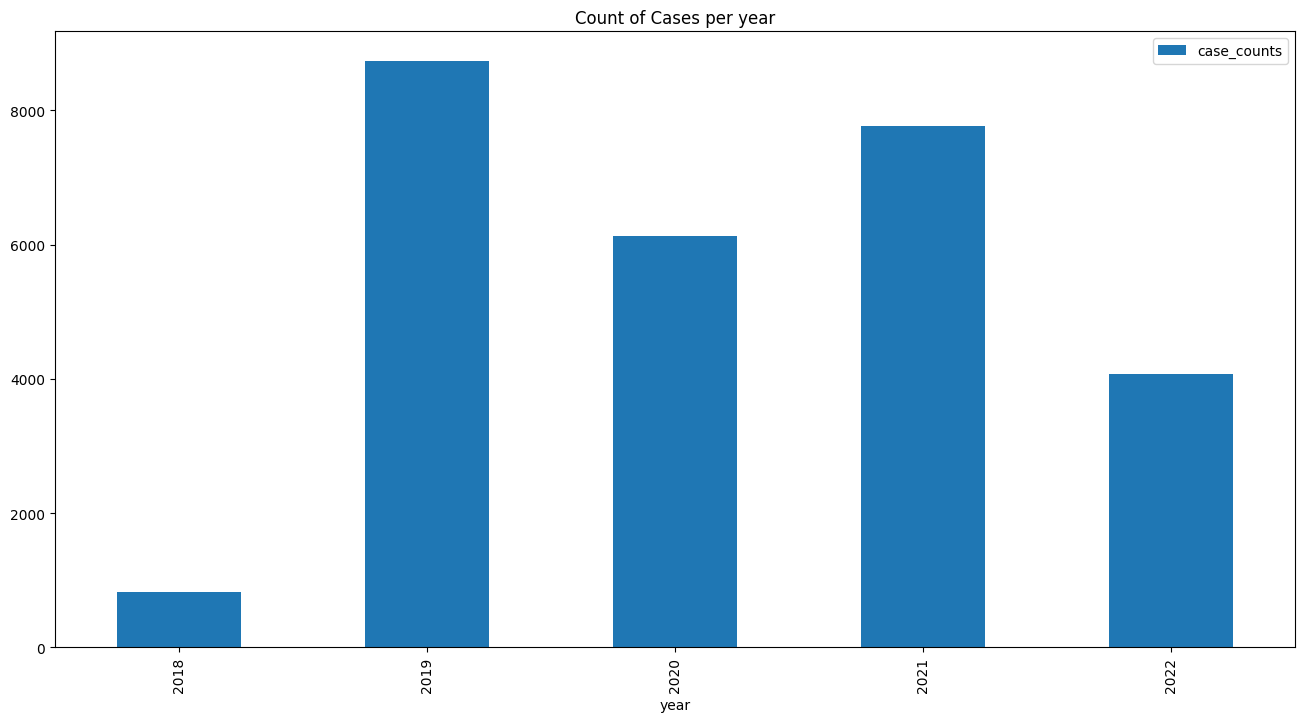

In [ ]:
# Another way to check for missing values is looking at trends
# Lets look at # of cases:
arrests["case_counts"] = 1
cases = arrests[["case_counts", "year"]].groupby(by=["year"]).sum().reset_index()
# cases.year.value_counts().plot(kind= 'bar',figsize=(16,8), title="Count of offenses per year")
print(arrests['datetimeofarrest'].describe(datetime_is_numeric=True))
cases.plot(kind="bar", figsize=(16, 8), title="Count of Cases per year", x="year")


**Note:** *Data collection for this data set started with cases from Octobe 2018, the most recent case is from the last day of May in 2022. With this information we can say there are no unexpected trends in the count of cases per year.*
<br>
Categorical values can be checked for correctness based on how consistent are categories.

In [ ]:
# To check for consistency of categorical values, use ".value_counts()" in each categorical column
# Think of the possible categories of that column and if there are possible typos, change the type
print("\nSkin Tone:")
print(arrests['skintone'].value_counts())
print("\nRace:")
print(arrests['race'].value_counts())
print("\nType of Arrest:")
print(arrests['typeofarrest'].value_counts())
print("\nCharge Type:")
print(arrests['charge_type'].value_counts())


Skin Tone:
Medium     11707
Dark        5937
Light       3508
Fair        2257
Black       1017
Olive        755
Other         32
Unknown       16
Ruddy          9
Albino         2
Yellow         1
Name: skintone, dtype: int64

Race:
B    21381
W     5942
A       99
U       53
I       51
Name: race, dtype: int64

Type of Arrest:
TAKEN INTO CUSTODY    13216
ON VIEW               10964
SUMMONED/CITED         3346
Name: typeofarrest, dtype: int64

Charge Type:
Misd    18715
Fel      8809
I           1
2           1
Name: charge_type, dtype: int64


In [ ]:
# For practical purposes, we can combine skin tones "fair" and "light", we can also get rid of Yellow since there is only one. Ruddy?

In [ ]:
# Lets examine the non-conforming categories in the "charge_type" column:
arrests.loc[arrests['charge_type']=='I']

,agencyname,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,age,race,sex,citizenship,skintone,height,weight,haircolor,eyecolor,armed,typeofarrest,placeofarrest,page_num,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum,year,case_counts
6444,Durham Police Department,2022-03-27 13:23:00,00 Raw Data/data/arrests0003131.pdf,329847,NaN,19,B,M,US,Dark,5'05,135.0,Black,Brown,UNARMED,TAKEN INTO CUSTODY,"3643 N ROXBORO ST, DURHAM",0.0,Speeding - Failure To Reduce To Avoid Accident,I,1.0,9914,20-141(M),03/27/2022,3,2022,1


In [ ]:
# One option is to look at which type of charge is often given to the charge in question
print(arrests.loc[arrests['charges']=='Speeding - Failure To Reduce To Avoid Accident', 'charge_type'].value_counts())

#Here we can see that this charge is always a misdemeanor, except for that one potential typo. To fix it, use:
arrests.loc[arrests['charge_type']=='I', 'charge_type']='Misd'
arrests.loc[arrests['charge_type']=='2', 'charge_type']='Misd' 

# Done! (do the same for the other potential typo)

Misd    17
I        1
Name: charge_type, dtype: int64


<font color=#FF0000>*Write about considerations regarding preceived vs. actual demographics, add maybe thresholds... <br>(How old is too old?, how incomplete is too incomplete? )*</font><br><br>

### **Step #4:** Compute Summary Statistics
Numerical fields can be summarized using quantiles, mean and median.<br>
Categorical fields can be summarized using tables.<br>

In [ ]:
# Numerical Variables
arrests['age'].describe() 

# the mean age of the arrested population between October 2018 and June 2022 is 34 years. 
# Age max value is 92 and the minimum is 0. Lets investigate the 0 age rows

count    27526.000000
mean        34.193817
std         11.901175
min          0.000000
25%         25.000000
50%         31.000000
75%         42.000000
max         92.000000
Name: age, dtype: float64

In [ ]:
print(len(arrests.loc[arrests['age']==0]))
arrests.loc[arrests['age']<18] # these could be typos. 

6


,agencyname,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,age,race,sex,citizenship,skintone,height,weight,haircolor,eyecolor,armed,typeofarrest,placeofarrest,page_num,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum,year,case_counts
5657,Durham Police Department,2021-09-22 22:13:00,00 Raw Data/data/arrests0001774.pdf,326227,TATT ALL NECK / BABY BOY; TATT NECK; PI...,0,B,M,US,Medium,5'08,155.0,Black,Brown,UNARMED,TAKEN INTO CUSTODY,"4815 S SINGING WOODS PL, DURHAM",0.0,Assault On Female,Misd,1.0,13B,14-33(C2),09/20/2021,1,2021,1
6243,Durham Police Department,2020-04-30 16:00:00,00 Raw Data/data/arrests0013640.pdf,318045,NaN,0,B,F,US,Unknown,5'06,140.0,Unknown/Bald,Unknown,UNARMED,ON VIEW,"3825 S ROXBORO ST, DURHAM",0.0,Larceny (misdemeanor),Misd,1.0,23H,14-72(A) M,04/30/2020,1,2020,1
6244,Durham Police Department,2020-04-30 16:00:00,00 Raw Data/data/arrests0013640.pdf,318045,NaN,0,B,F,US,Unknown,5'06,140.0,Unknown/Bald,Unknown,UNARMED,ON VIEW,"3825 S ROXBORO ST, DURHAM",0.0,Resist Delay Obstruct Public Officer,Misd,1.0,90Z,14-223,04/30/2020,2,2020,1
6245,Durham Police Department,2020-05-13 03:06:00,00 Raw Data/data/arrests0011418.pdf,318227,NaN,0,B,F,US,Unknown,5'06,140.0,Unknown/Bald,Unknown,UNARMED,ON VIEW,"1002 N ALSTON AVE, DURHAM",0.0,Possessing Stolen Goods,Fel,1.0,280,14-71.1,05/13/2020,1,2020,1
20258,Durham Police Department,2022-02-17 15:08:00,00 Raw Data/data/arrests0004535.pdf,328253,NaN,0,W,M,HD,Medium,5'08,200.0,Black,Brown,UNARMED,ON VIEW,"1525 GLENN SCHOOL RD, DURHAM",0.0,Shoplifting,Misd,1.0,23C,14-72.1,02/17/2022,1,2022,1
26980,Durham Police Department,2020-02-27 14:44:00,00 Raw Data/data/arrests0009112.pdf,317336,TATT RIGH CHEST / EMPTY FIVE POINT STAR; TATT ...,0,B,M,US,Medium,6'00,175.0,Black,Brown,UNARMED,TAKEN INTO CUSTODY,"322 JUNCTION RD, DURHAM",0.0,Warrant Service For Other Jurisdiction,Misd,1.0,9910,WARR,02/26/2020,1,2020,1


Missing values can be imputed using the mean age or just dropped from the dataset if there are not that many. In this case, there are only 6 rows with an age value that is less than 18. 

In [ ]:
arrests['charge_counts'].describe()
# The charge counts tells how many charges were made in one arrest instance or case. The mean, max and min values seem reasonable.

count    27526.000000
mean         1.076546
std          0.526283
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: charge_counts, dtype: float64

In [ ]:
# Categorical Variables: First, we may want to look at overall counts of offenses for each categorical variable of interest
# In this example, we will use race and sex as our categorical variable of interests
arrests['race'].value_counts()

B    21381
W     5942
A       99
U       53
I       51
Name: race, dtype: int64

In [ ]:
arrests['sex'].value_counts()

M    21318
F     6208
Name: sex, dtype: int64

In [ ]:
# Categorical Variables: We want to see how these variables relate to race and gender
pd.crosstab(index=arrests['charge_type'], columns=arrests['race'])

race,A,B,I,U,W
charge_type,,,,,
Fel,26,7241,17,7,1518
Misd,73,14140,34,46,4424


In [ ]:
pd.crosstab(index=arrests['charge_type'], columns=arrests['sex'])

sex,F,M
charge_type,,
Fel,1948,6861
Misd,4260,14457


In [ ]:
pd.crosstab(index=arrests['charge_type'], columns=arrests['skintone'])

skintone,Albino,Black,Dark,Fair,Light,Medium,Olive,Other,Ruddy,Unknown,Yellow
charge_type,,,,,,,,,,,
Fel,0,313,1817,638,1040,4205,159,13,2,3,0
Misd,2,704,4120,1619,2468,7502,596,19,7,13,1


We can go be even more specific in our comparisons: **How much more often are specific combinations of sex and gender getting a more severe charge (felony vs. misdemeanor) for *the same exact charge*?**

In [ ]:
# For practicality in this example and because the population of Durham is less diverse, we will reduce our dataset to only black and white defendants

# Create a sex-race interacton field

# Find a specific charge that can be both felony and misdemeanor

# Look at the difference (this of course ignorse prior record, which may explain the difference)
